Given the following dataset, calculate the average lifetime value of a customer.

Below are a couple of definitions to help solve the problem:

* Lifetime value is average revenue divided by the churn rate
* Churn rate is defined as the total number of churned customers / total number of customers

In [51]:
#Importing packages
import pandas as pd
import numpy as np

#Read in the dataset
data = pd.read_csv("https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/teleco_user_data.csv") 
#Convert these column types to int
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, downcast='integer', errors='coerce')
data['MonthlyCharges'] = pd.to_numeric(data.MonthlyCharges, downcast='integer', errors='coerce')
data.head().transpose()

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [146]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [140]:
churn_rate=1869/7043
churn_rate #Churn rate is defined as the total number of churned customers / total number of customers

0.2653698707936959

In [145]:
avg=data['TotalCharges'].mean()
life_time_value=avg/churn_rate
life_time_value
#It helps a company identify how much revenue they can expect to earn from a customer over the 
# life of their relationship with the company.

8604.218836195445

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [53]:
# dropping irrelavent feature 
data.drop(['customerID'], axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Handling nulls

In [54]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [55]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True) # continous numeric variable filled with mean
data.isnull().sum().sum()

0

### Data Types

In [56]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print(categorical)

There are 16 categorical variables
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [57]:
numeric = [num for num in data.columns if data[num].dtype!='O']
print('There are {} numeric variables'.format(len(numeric)))
numeric

There are 4 numeric variables


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [58]:
# let's visualise the values of the discrete variables 
# from all the numerical ones, those that contain a finite and small number of distinct values

discrete=[]
for var in numeric:
    if len(data[var].unique())<45:
        print (var, ' values: ', data[var].unique())
        discrete.append(var)
print('There are {} discrete variables'.format(len(discrete)))

SeniorCitizen  values:  [0 1]
There are 1 discrete variables


In [59]:
# continous variables 
continuous = [var for var in numeric if var not in discrete]
continuous

['tenure', 'MonthlyCharges', 'TotalCharges']

In [60]:
# let's visualise the values of the categorical variables
for var in categorical:
    print(var, ' values: ', data[var].unique())

gender  values:  ['Female' 'Male']
Partner  values:  ['Yes' 'No']
Dependents  values:  ['No' 'Yes']
PhoneService  values:  ['No' 'Yes']
MultipleLines  values:  ['No phone service' 'No' 'Yes']
InternetService  values:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  values:  ['No' 'Yes' 'No internet service']
OnlineBackup  values:  ['Yes' 'No' 'No internet service']
DeviceProtection  values:  ['No' 'Yes' 'No internet service']
TechSupport  values:  ['No' 'Yes' 'No internet service']
StreamingTV  values:  ['No' 'Yes' 'No internet service']
StreamingMovies  values:  ['No' 'Yes' 'No internet service']
Contract  values:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  values:  ['Yes' 'No']
PaymentMethod  values:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  values:  ['No' 'Yes']


In [61]:
## Look at most frequent PaymentMethod
data['PaymentMethod'].value_counts().head(10)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [62]:
## Look at most frequent Churn
data['Churn'].value_counts().head(10)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [63]:
# A simple and intuitive way to convert the target feature to numeric
data['Churn'] = data['Churn'].replace(to_replace = "Yes", value = 1) # left
data['Churn'] = data['Churn'].replace(to_replace = "No", value = 0) # not left
Chrun= data['Churn'].value_counts()
Chrun

0    5174
1    1869
Name: Churn, dtype: int64

##### Grouping for visualization

In [64]:
data.groupby(['TechSupport'])['Churn'].mean().sort_values(ascending=False).head(15)

TechSupport
No                     0.416355
Yes                    0.151663
No internet service    0.074050
Name: Churn, dtype: float64

In [65]:
groupedby_churn = data.groupby('Churn')
groupedby_techsupport = data.groupby('TechSupport')
groupedby_OnlineBackup = data.groupby('OnlineBackup')
groupedby_InternetService = data.groupby('InternetService')
groupedby_PaperlessBilling=data.groupby('PaperlessBilling')

In [66]:
#Visualize the data by 'TechSupport' being yes
TechSupport_group = groupedby_techsupport.get_group('Yes')
TechSupport_group[['TechSupport','Churn', 'StreamingTV',]].head(10)

,TechSupport,Churn,StreamingTV
3,Yes,0,No
8,Yes,1,Yes
14,Yes,0,Yes
15,Yes,0,Yes
18,Yes,1,No
23,Yes,0,No
24,Yes,0,No
28,Yes,0,Yes
30,Yes,0,No
32,Yes,0,No


In [67]:
#Visualize the data by 'PaperlessBilling' being yes
PaperlessBilling_group = groupedby_PaperlessBilling.get_group('Yes')
PaperlessBilling_group[['PaperlessBilling','Churn', 'MultipleLines',]].head(10)

,PaperlessBilling,Churn,MultipleLines
0,Yes,0,No phone service
2,Yes,1,No
4,Yes,1,No
5,Yes,1,Yes
6,Yes,0,Yes
8,Yes,1,Yes
10,Yes,0,No
13,Yes,1,Yes
14,Yes,0,No
19,Yes,0,No


In [68]:
#Visualize the data by 'InternetService' being fiber optic
InternetService_group = groupedby_InternetService.get_group('Fiber optic')
InternetService_group[['InternetService','Churn', 'MultipleLines',]].head(10)

,InternetService,Churn,MultipleLines
4,Fiber optic,1,No
5,Fiber optic,1,Yes
6,Fiber optic,0,Yes
8,Fiber optic,1,Yes
12,Fiber optic,0,Yes
13,Fiber optic,1,Yes
14,Fiber optic,0,No
15,Fiber optic,0,Yes
17,Fiber optic,0,Yes
19,Fiber optic,0,No


In [69]:
#Visualize the data by 'onlinebackup' being YES
OnlineBackup_group = groupedby_OnlineBackup.get_group('Yes')
OnlineBackup_group[['OnlineBackup','Churn', 'PaymentMethod',]].head(10)

,OnlineBackup,Churn,PaymentMethod
0,Yes,0,Electronic check
2,Yes,1,Mailed check
6,Yes,0,Credit card (automatic)
9,Yes,0,Bank transfer (automatic)
13,Yes,1,Bank transfer (automatic)
15,Yes,0,Credit card (automatic)
19,Yes,0,Electronic check
23,Yes,0,Credit card (automatic)
24,Yes,0,Credit card (automatic)
25,Yes,0,Bank transfer (automatic)


### converting categorical data into numerical

In [70]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Categorical boolean mask
categorical_feature_mask = data.dtypes=='object'
#filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()

In [71]:
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].sample(5)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5647,0,1,0,1,0,0,0,2,0,0,2,2,0,1,1
2668,1,0,1,1,0,2,1,1,1,1,1,1,0,0,3
3224,0,0,0,1,2,0,0,0,0,2,2,2,0,1,2
3657,0,1,1,1,2,2,1,1,1,1,1,1,2,1,0
5659,1,0,0,1,2,0,2,0,2,2,0,2,2,1,0


In [72]:
# instantiate OneHotEncoder
ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False ) 
#categorical_features = boolean mask for categorical columns
#sparse = False output an array not sparse matrix

In [35]:
# apply OneHotEncoder on categorical feature columns
X_ohe = ohe.fit_transform(data) # It returns an numpy array
data.sample(5)

D:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
464,1024,1,1,1,0,72,1,2,1,2,...,2,2,2,2,2,1,0,116.05,8404.90,0
1330,450,1,0,1,0,22,1,0,0,2,...,0,2,0,0,1,1,1,56.25,1292.20,0
498,4424,0,1,0,0,5,0,1,0,0,...,0,0,0,0,0,0,2,28.45,131.05,1
1722,6397,0,0,0,0,51,0,1,0,0,...,2,0,2,2,1,1,1,56.40,2928.50,0
5431,4255,0,0,0,0,37,1,0,2,1,...,1,1,1,1,1,1,2,19.80,695.05,0


### Outliers

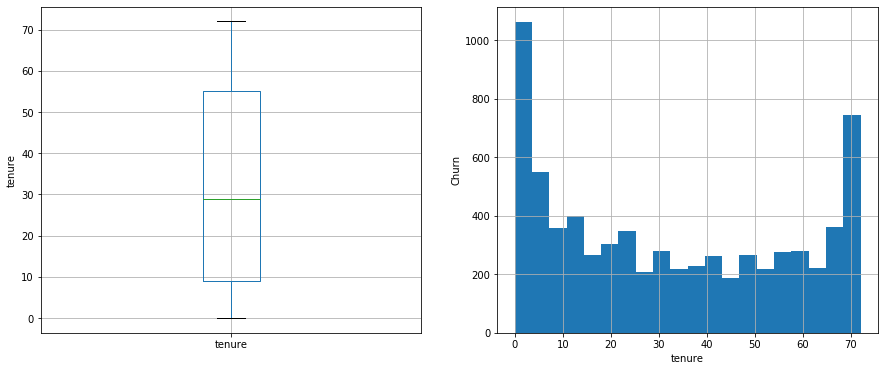

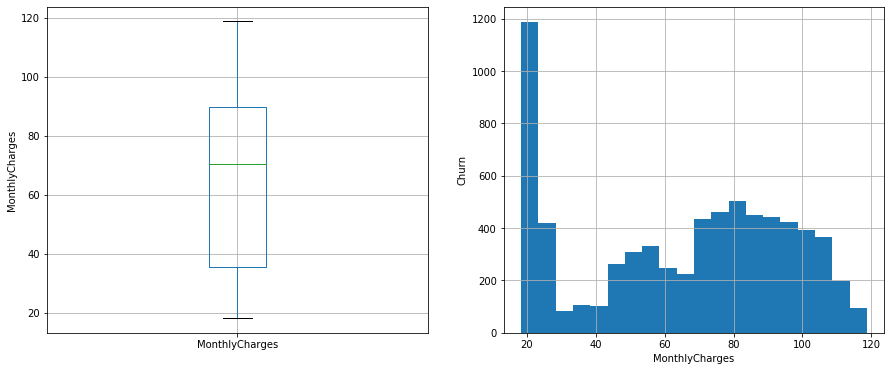

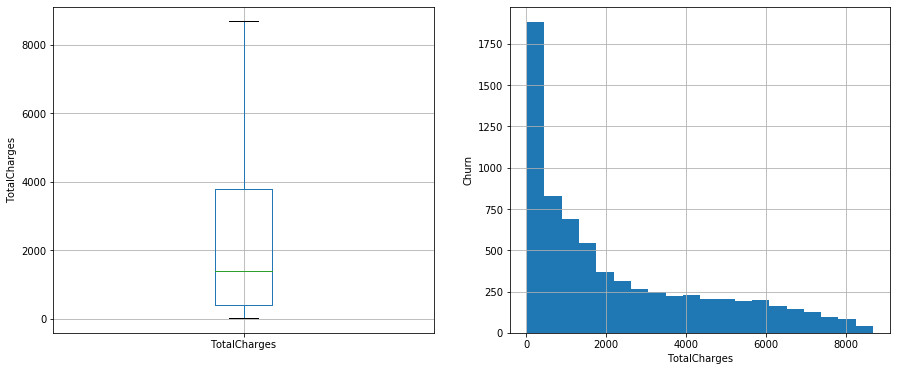

In [26]:
import matplotlib.pyplot as plt
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution

for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data[var].hist(bins=20)
    fig.set_ylabel('Churn')
    fig.set_xlabel(var)

    plt.show()

In [ ]:
# let's have a look at the most extreme outliers
data[data.MonthlyCharges<30]

* Most of the customers with monthly charges of <30 are staying with the company services

### Data Visualization

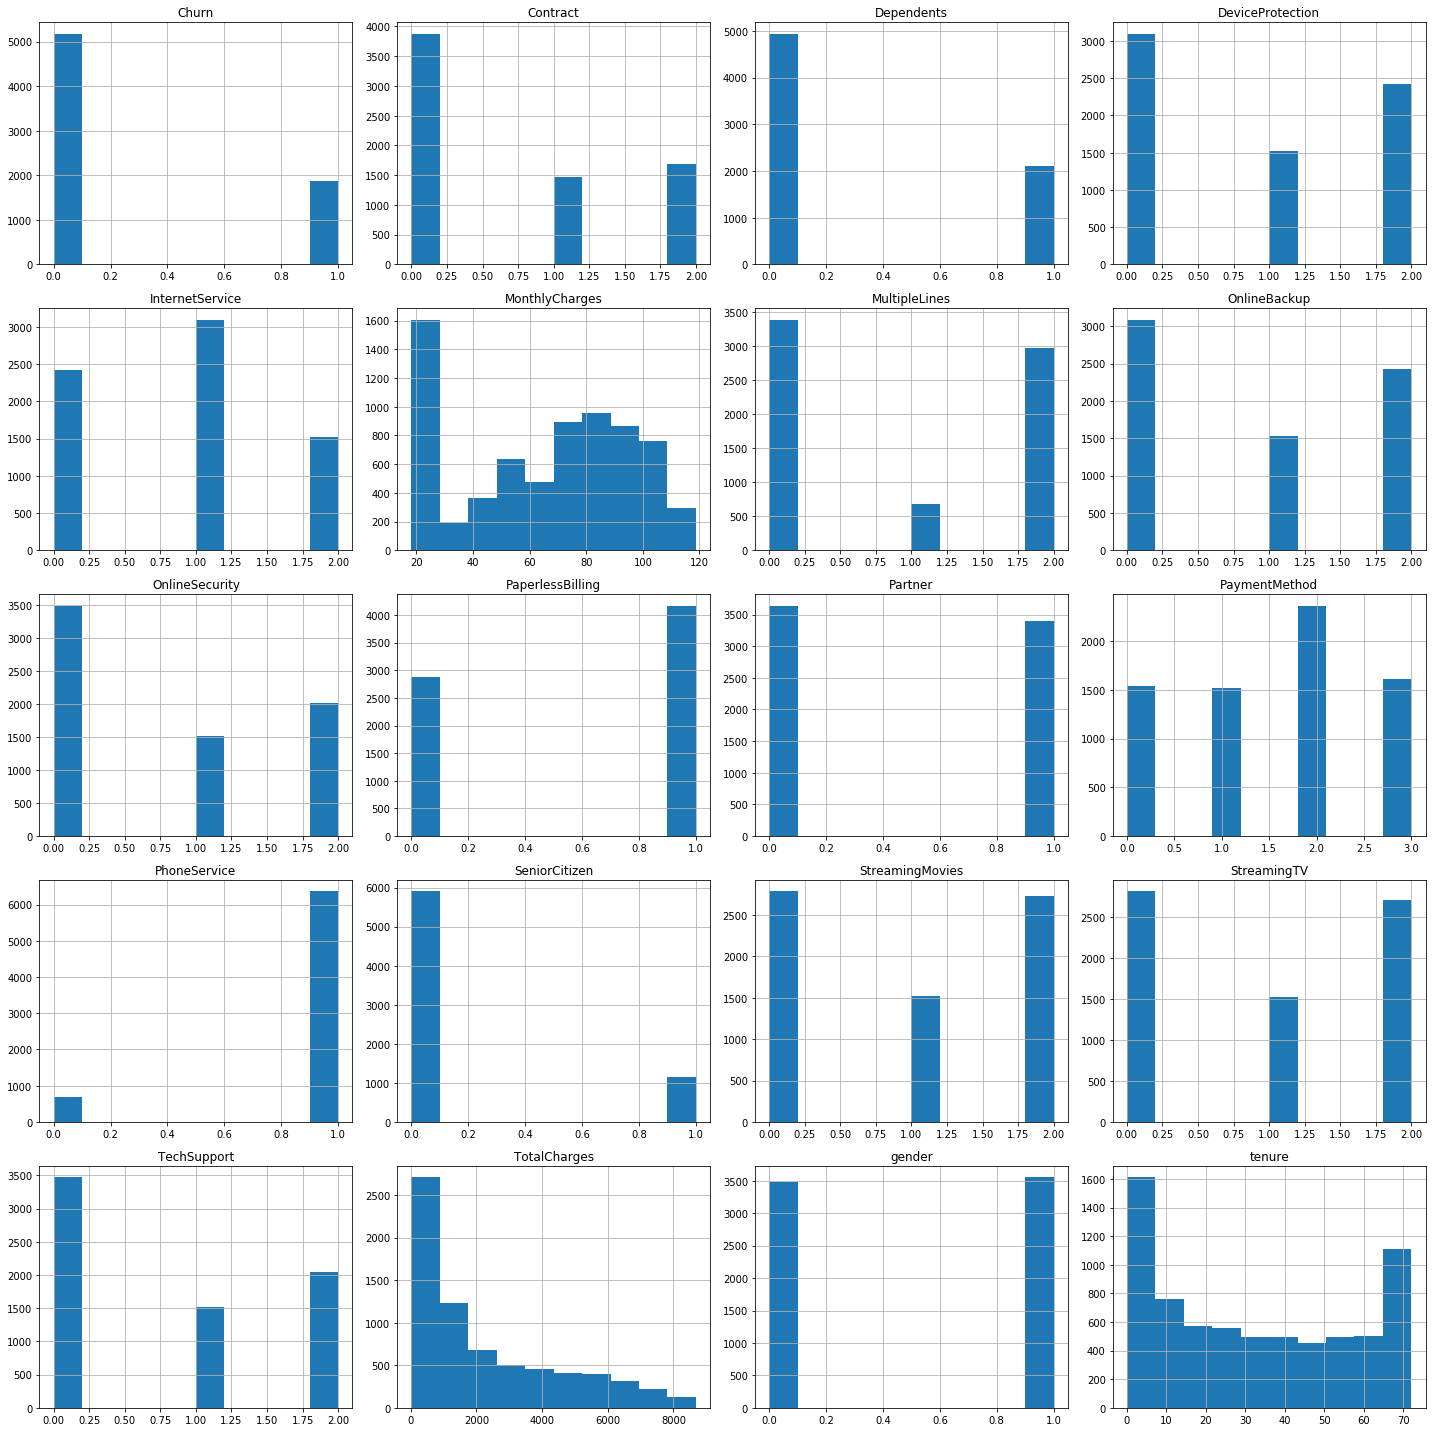

In [75]:
data.hist(figsize=(20, 20))
plt.tight_layout()# tight_layout() will adjust spacing between subplots to minimize the overlaps. let's make good plots
plt.show()

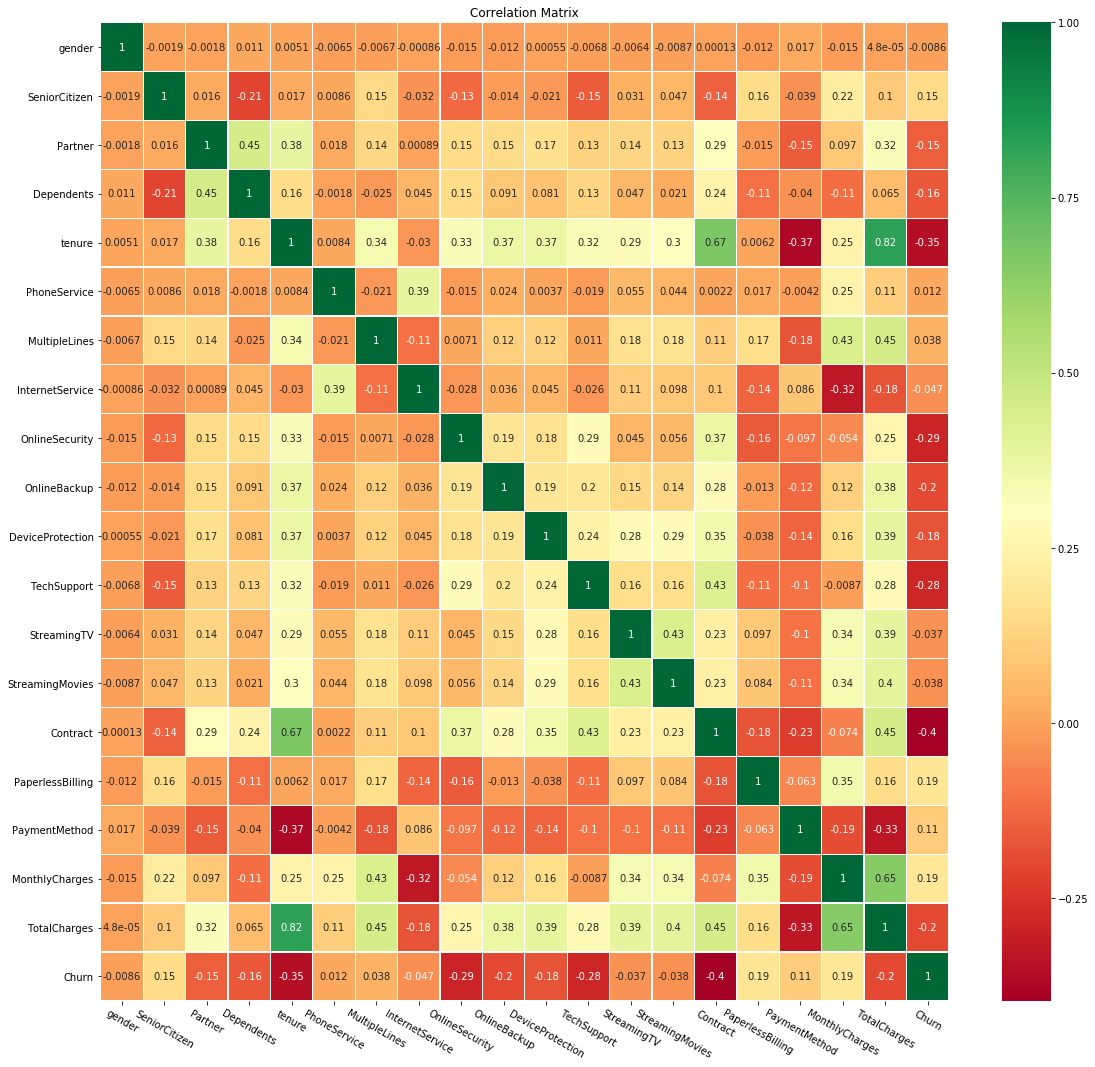

In [82]:
import seaborn as sns
corr = data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(19,18)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

* TotalCharges has +82% correlation with tenure, 45% with MultipleLines and 65% with Monthly Charges
* Contract has +67% correlation with tenure, 43% with TechSupport, +45% with TotalCharges
* Streaming Movies has +43% correction with StreamingTv
* Dependends has good relation with Partner, says that there are dependents when partners are present

In [83]:
data.corr()*100

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,100.000000,-0.187371,-0.180808,1.051661,0.510622,-0.648767,-0.673874,-0.086338,-1.501689,-1.205675,0.054904,-0.682456,-0.642137,-0.874315,0.012575,-1.175369,1.735226,-1.456932,0.004780,-0.861210
SeniorCitizen,-0.187371,100.000000,1.647866,-21.118509,1.656688,0.857640,14.618487,-3.231015,-12.822131,-1.363214,-2.139765,-15.126770,3.077635,4.726636,-14.255408,15.652956,-3.855081,22.017334,10.239510,15.088933
Partner,-0.180808,1.647866,100.000000,45.267628,37.969746,1.770566,14.241049,0.089135,15.082828,15.313013,16.633035,12.673332,13.734144,12.957389,29.480622,-1.487662,-15.479753,9.684794,31.881156,-15.044754
Dependents,1.051661,-21.118509,45.267628,100.000000,15.971233,-0.176168,-2.499064,4.459044,15.216638,9.101477,8.053716,13.352353,4.688489,2.132102,24.318747,-11.137723,-4.029190,-11.389023,6.453492,-16.422140
tenure,0.510622,1.656688,37.969746,15.971233,100.000000,0.844821,34.303185,-3.035903,32.546784,37.087612,37.110544,32.294158,28.937322,29.686627,67.160655,0.615248,-37.043612,24.789986,82.475732,-35.222867
PhoneService,-0.648767,0.857640,1.770566,-0.176168,0.844821,100.000000,-2.053783,38.743602,-1.519834,2.410479,0.372732,-1.915769,5.535325,4.386962,0.224737,1.650481,-0.418405,24.739796,11.285074,1.194198
MultipleLines,-0.673874,14.618487,14.241049,-2.499064,34.303185,-2.053783,100.000000,-10.921580,0.714051,11.732730,12.231803,1.146609,17.505902,18.095716,11.084224,16.514589,-17.679341,43.357601,45.288314,3.803689
InternetService,-0.086338,-3.231015,0.089135,4.459044,-3.035903,38.743602,-10.921580,100.000000,-2.841618,3.613794,4.494427,-2.604695,10.741677,9.834961,9.972078,-13.862478,8.613986,-32.326019,-17.542894,-4.729139
OnlineSecurity,-1.501689,-12.822131,15.082828,15.216638,32.546784,-1.519834,0.714051,-2.841618,100.000000,18.512559,17.598533,28.502847,4.466927,5.595361,37.441554,-15.764119,-9.672595,-5.387809,25.430830,-28.930900
OnlineBackup,-1.205675,-1.363214,15.313013,9.101477,37.087612,2.410479,11.732730,3.613794,18.512559,100.000000,18.775686,19.574815,14.718566,13.672196,28.098014,-1.337038,-12.484738,11.977725,37.536153,-19.552501


Text(0, 0.5, 'Churn')

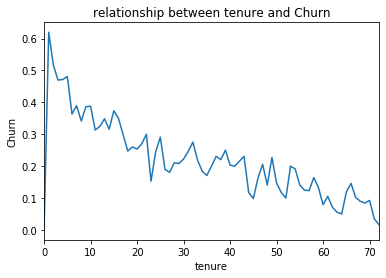

In [86]:
fig = plt.figure()
fig = data.groupby(['tenure'])['Churn'].mean().plot()
fig.set_title('relationship between tenure and Churn')
fig.set_ylabel('Churn')

* larger the tenure the churn rate is less

Text(0, 0.5, 'Churn')

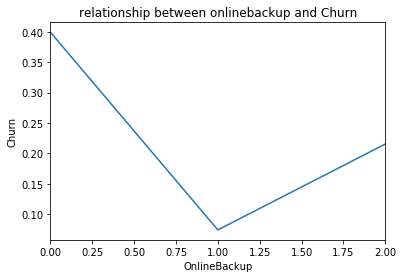

In [87]:
fig = plt.figure()
fig = data.groupby(['OnlineBackup'])['Churn'].mean().plot()
fig.set_title('relationship between onlinebackup and Churn')
fig.set_ylabel('Churn')

* when the onlinebackup is <1 then chrun rate is more

Text(0, 0.5, 'Churn')

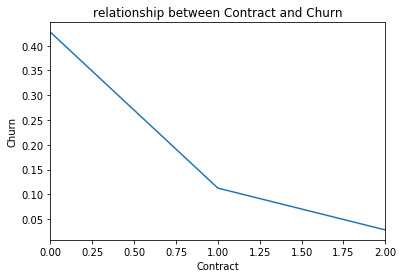

In [88]:
fig = plt.figure()
fig = data.groupby(['Contract'])['Churn'].mean().plot()
fig.set_title('relationship between Contract and Churn')
fig.set_ylabel('Churn')

* clients >1 year contract have more rate of churn

Text(0.5, 1.0, 'Churn Rate Distribution')

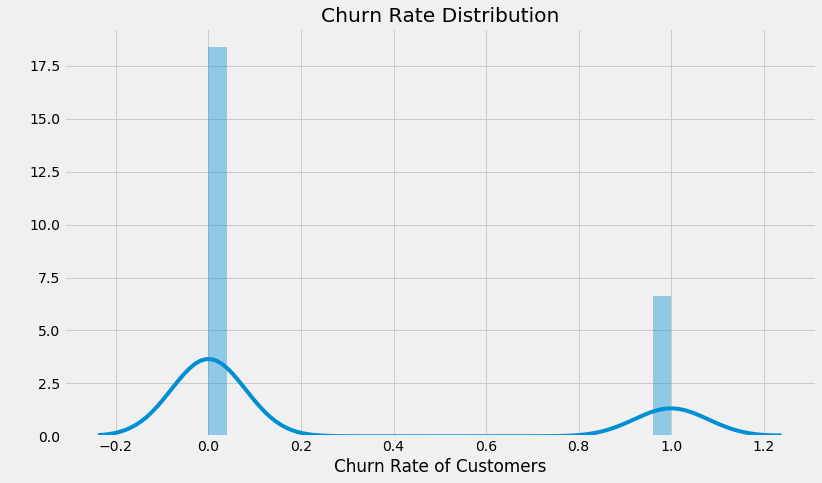

In [90]:
#Distribution of the target variable: Rating
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(data['Churn'], bins=25)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,1))
plt.xlabel("Churn Rate of Customers")
plt.ylabel(" ")
plt.title("Churn Rate Distribution")

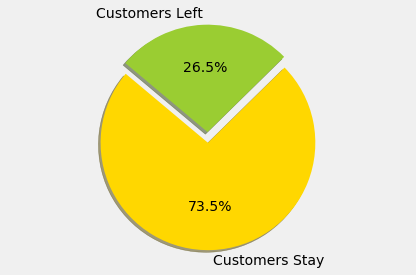

In [92]:
# Pie chart 
labels = ['Customers Stay', 'Customers Left'] #0    5174, 1    1869
sizes = [5174, 1869]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.tight_layout()
plt.show() 

Text(0.5, 1.0, 'Boxplot, Churn for Contract')

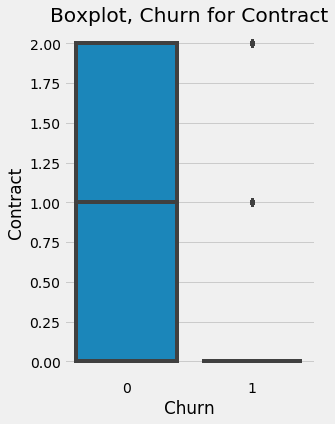

In [96]:
fig, ax = plt.subplots(figsize=[4, 6])
sns.boxplot(
    data=data,
    y='Contract',
    x='Churn'
)
ax.set_title('Boxplot, Churn for Contract')

Text(0.5, 1.0, 'Boxplot, Churn for TotalCharges')

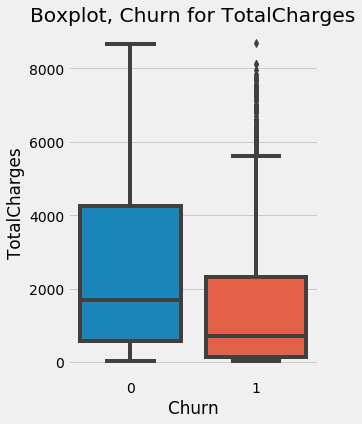

In [97]:
fig, ax = plt.subplots(figsize=[4, 6])
sns.boxplot(
    data=data,
    y='TotalCharges',
    x='Churn'
)
ax.set_title('Boxplot, Churn for TotalCharges')

Text(0.5, 1.0, 'Boxplot, Churn for TechSupport')

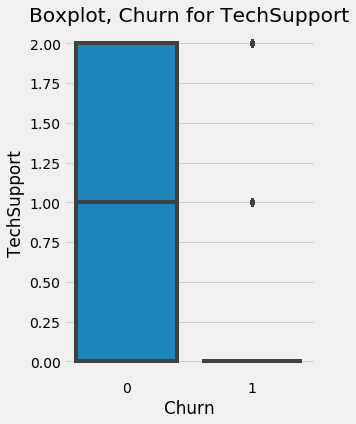

In [98]:
fig, ax = plt.subplots(figsize=[4, 6])
sns.boxplot(
    data=data,
    y='TechSupport',
    x='Churn'
)
ax.set_title('Boxplot, Churn for TechSupport')

Text(0.5, 1.0, 'Boxplot, Churn for PaymentMethod')

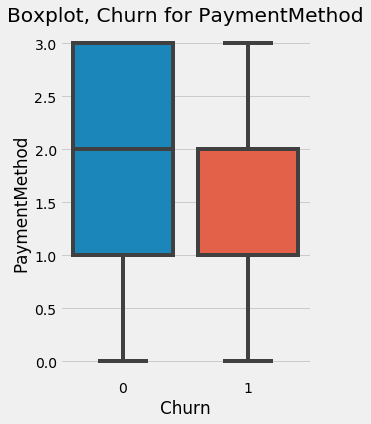

In [101]:
fig, ax = plt.subplots(figsize=[4, 6])
sns.boxplot(
    data=data,
    y='PaymentMethod',
    x='Churn'
)
ax.set_title('Boxplot, Churn for PaymentMethod')

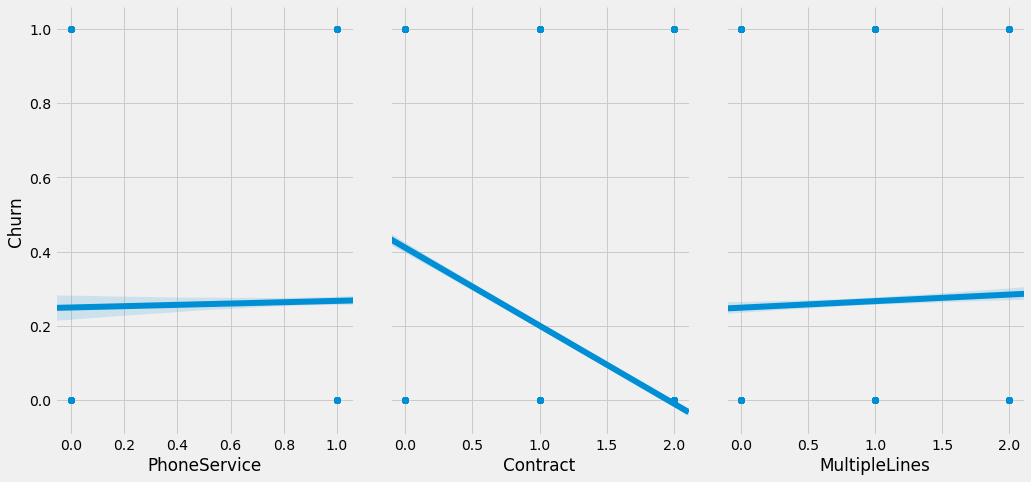

In [103]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['PhoneService','Contract','MultipleLines'], y_vars='Churn', size=7, aspect=0.7, kind='reg')

In [110]:
# seperating target variable
X=data.iloc[:,:19]
y=data['Churn']
print(X.shape),(y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=0)
print('The Shape of X_TRAIN is',X_train.shape)
print('The Shape of X_TEST is',X_test.shape)
print('The Shape of Y_TRAIN is',y_train.shape)
print('The Shape of Y_TEST is',y_test.shape)

(7043, 19)
The Shape of X_TRAIN is (4930, 19)
The Shape of X_TEST is (2113, 19)
The Shape of Y_TRAIN is (4930,)
The Shape of Y_TEST is (2113,)


In [111]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# Compare classification algorithms

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [113]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

In [115]:
import warnings
warnings.filterwarnings('ignore')

results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state='seed')    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.801623 (0.014678)
KNN: 0.760446 (0.025999)
DTree: 0.719270 (0.010817)
NB: 0.755984 (0.020983)
ADA: 0.801217 (0.016825)
RF: 0.777890 (0.015401)
XGB: 0.803245 (0.015920)


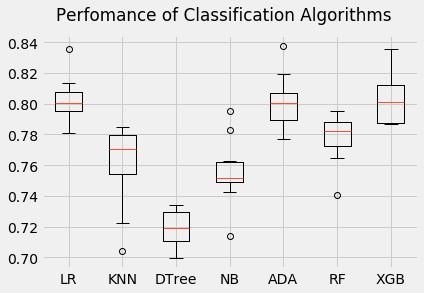

In [116]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

In [118]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

xgb_model = xgb.XGBClassifier()

eval_set = [(X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_metric="auc", eval_set=eval_set, verbose=False)

pred = xgb_model.predict_proba(X_train)
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = xgb_model.predict_proba(X_test)
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

y_pred = xgb_model.predict(X_test) # make predictions for test data 

print(confusion_matrix(y_test, y_pred))
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

xgb train roc-auc: 0.8809874592727035
xgb test roc-auc: 0.8409404414151249
[[1388  172]
 [ 258  295]]
Accuracy: 79.65%


confusion_matrix [[1388  172]
 [ 258  295]]


Text(84.34, 0.5, 'Actual')

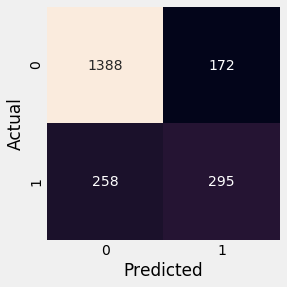

In [119]:
# Plot Confusion Matrix

mat = confusion_matrix(y_test, y_pred)
print('confusion_matrix',mat)
names = np.unique(y_pred)
#Heat map works by correlation. This shows you which variables are correlated to each other 
#from a scale of 1 being the most correlated and -1 is not correlated at all
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [120]:
# summarize the fit of the model
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1560
           1       0.63      0.53      0.58       553

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

confusion matrix: 
[[1388  172]
 [ 258  295]]


In [126]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred[0:25])

True: [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
Pred: [0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]


In [128]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [129]:
# Accuracy
print((TP + TN) / float(TP + TN + FP + FN)*100)
print(metrics.accuracy_score(y_test, y_pred)*100)

79.649787032655
79.649787032655


In [130]:
# misclassification
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred))

0.20350212967345008
0.20350212967345005


In [132]:
# Recall rate/ Sensitivity: When the actual value is positive, how often is the prediction correct?
# How "sensitive" is the classifier to detecting positive instances? Also known as "True Positive Rate" or "Recall"
print(TP / float(TP + FN)*100)
print(metrics.recall_score(y_test, y_pred)*100)

53.34538878842676
53.34538878842676


In [135]:
# Precision rate
# Precision: When a positive value is predicted, how often is the prediction correct?
# How "precise" is the classifier when predicting positive instances?
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred))

0.6316916488222698
0.6316916488222698


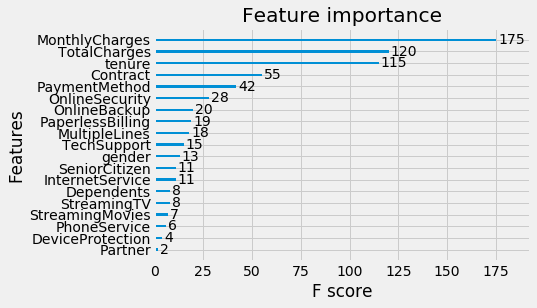

In [124]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(xgb_model)
plt.show() 

AUC: 0.7115987388139287


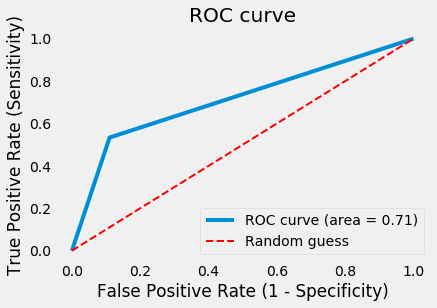

In [136]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print("AUC:", auc)

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid()
plt.legend()
plt.show()

In [138]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(xgb_model, X, y, cv=10, scoring='roc_auc').mean()

0.8473691730827666